In [ ]:
!unzip archive.zip

In [ ]:
import os
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = tf.convert_to_tensor(img)
        if img is not None:
            images.append(img)
    return images

In [ ]:
X_bears = np.concatenate(
    (np.array(load_images_from_folder('../content/PandasBears/Train/Bears')),
     np.array(load_images_from_folder('../content/PandasBears/Test/Bears'))), axis = 0
)
X_pandas = np.concatenate(
    (np.array(load_images_from_folder('../content/PandasBears/Train/Pandas')),
     np.array(load_images_from_folder('../content/PandasBears/Test/Pandas'))), axis = 0
)

In [ ]:
X = np.concatenate(
    (X_bears, X_pandas), axis = 0
)
y = np.concatenate(
    (np.zeros(shape = 300), np.ones(shape = 300)),
    axis = 0
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()

In [ ]:
y_train

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[0].shape),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10** (epoch / 4))

history = model.fit(X_train_norm, y_train, epochs = 15)

Epoch 1/15
15/15 [==============================] - 7s 376ms/step - loss: 8.9855 - accuracy: 0.8083
Epoch 2/15
15/15 [==============================] - 6s 391ms/step - loss: 1.0121 - accuracy: 0.9708
Epoch 3/15
15/15 [==============================] - 6s 381ms/step - loss: 1.0050 - accuracy: 0.9729
Epoch 4/15
15/15 [==============================] - 7s 505ms/step - loss: 0.1439 - accuracy: 0.9917
Epoch 5/15
15/15 [==============================] - 6s 405ms/step - loss: 0.1558 - accuracy: 0.9917
Epoch 6/15
15/15 [==============================] - 7s 479ms/step - loss: 4.5880e-09 - accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 7s 479ms/step - loss: 3.5545e-04 - accuracy: 1.0000
Epoch 8/15
15/15 [==============================] - 7s 462ms/step - loss: 1.0961e-10 - accuracy: 1.0000
Epoch 9/15
15/15 [==============================] - 6s 403ms/step - loss: 5.2358e-11 - accuracy: 1.0000
Epoch 10/15
15/15 [==============================] - 7s 467ms/step - loss: 4.8050e-1

In [ ]:
model.evaluate(X_test_norm, y_test)

4/4 [==============================] - 1s 77ms/step - loss: 1.9247e-21 - accuracy: 1.0000


[1.9247327611888634e-21, 1.0]

In [ ]:
model.save('model.h5')

In [ ]:
y_pred = model.predict(X_test_norm)

4/4 [==============================] - 0s 47ms/step


In [ ]:
y_pred = np.around(y_pred.squeeze())

In [ ]:
y_pred

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1.], dtype=float32)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

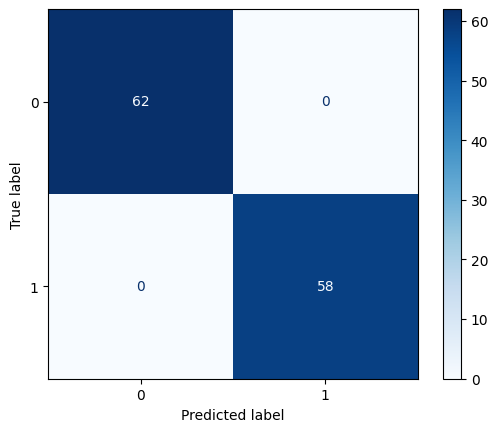

In [ ]:
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap = plt.cm.Blues)

<Axes: >

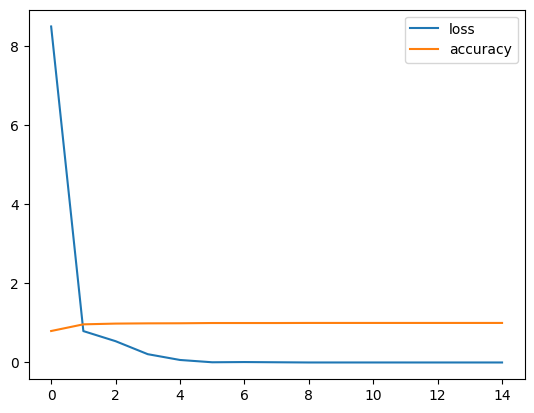

In [ ]:
pd.DataFrame(history.history).plot()